In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data.csv')

In [3]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
x=data.drop(['label'], axis=1)
y=data['label']

In [5]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [6]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 43), (1121, 43))

In [7]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 43), (169, 43))

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-07-25 22:50:32.456576: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-25 22:50:32.458013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-25 22:50:32.483056: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 22:50:32.483081: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 22:50:32.483096: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [9]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [10]:
model = Sequential([
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [11]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [12]:
# model.compile(optimizer=SGD(learning_rate=lr_schedule, 
#                             momentum=0.97, 
#                             nesterov=True),  # Enable Nesterov momentum
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=800,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/800
41/41 - 2s - loss: 1.9543 - accuracy: 0.2047 - val_loss: 1.8193 - val_accuracy: 0.2605 - 2s/epoch - 37ms/step
Epoch 2/800
41/41 - 1s - loss: 1.7902 - accuracy: 0.2888 - val_loss: 1.7055 - val_accuracy: 0.3288 - 549ms/epoch - 13ms/step
Epoch 3/800
41/41 - 1s - loss: 1.6788 - accuracy: 0.3259 - val_loss: 1.6289 - val_accuracy: 0.3561 - 549ms/epoch - 13ms/step
Epoch 4/800
41/41 - 1s - loss: 1.6042 - accuracy: 0.3577 - val_loss: 1.5553 - val_accuracy: 0.3992 - 538ms/epoch - 13ms/step
Epoch 5/800
41/41 - 1s - loss: 1.5416 - accuracy: 0.3795 - val_loss: 1.4914 - val_accuracy: 0.4359 - 529ms/epoch - 13ms/step
Epoch 6/800
41/41 - 1s - loss: 1.5245 - accuracy: 0.4101 - val_loss: 1.4666 - val_accuracy: 0.4632 - 550ms/epoch - 13ms/step
Epoch 7/800
41/41 - 1s - loss: 1.4265 - accuracy: 0.4357 - val_loss: 1.3605 - val_accuracy: 0.4622 - 531ms/epoch - 13ms/step
Epoch 8/800
41/41 - 1s - loss: 1.4030 - accuracy: 0.4407 - val_loss: 1.3636 - val_accuracy: 0.4496 - 528ms/epoch - 13ms/step
Epo

Epoch 67/800
41/41 - 1s - loss: 0.5534 - accuracy: 0.8114 - val_loss: 0.8198 - val_accuracy: 0.7626 - 535ms/epoch - 13ms/step
Epoch 68/800
41/41 - 1s - loss: 0.5149 - accuracy: 0.8244 - val_loss: 0.8125 - val_accuracy: 0.7584 - 536ms/epoch - 13ms/step
Epoch 69/800
41/41 - 1s - loss: 0.4866 - accuracy: 0.8344 - val_loss: 0.7868 - val_accuracy: 0.7658 - 532ms/epoch - 13ms/step
Epoch 70/800
41/41 - 1s - loss: 0.5174 - accuracy: 0.8164 - val_loss: 0.8311 - val_accuracy: 0.7647 - 533ms/epoch - 13ms/step
Epoch 71/800
41/41 - 1s - loss: 0.5185 - accuracy: 0.8317 - val_loss: 0.8279 - val_accuracy: 0.7584 - 536ms/epoch - 13ms/step
Epoch 72/800
41/41 - 1s - loss: 0.5852 - accuracy: 0.8114 - val_loss: 0.8380 - val_accuracy: 0.7605 - 537ms/epoch - 13ms/step
Epoch 73/800
41/41 - 1s - loss: 0.5261 - accuracy: 0.8244 - val_loss: 0.9334 - val_accuracy: 0.7489 - 539ms/epoch - 13ms/step
Epoch 74/800
41/41 - 1s - loss: 0.4966 - accuracy: 0.8366 - val_loss: 0.8861 - val_accuracy: 0.7521 - 536ms/epoch - 13

Epoch 132/800
41/41 - 1s - loss: 0.2977 - accuracy: 0.8963 - val_loss: 0.9478 - val_accuracy: 0.7973 - 549ms/epoch - 13ms/step
Epoch 133/800
41/41 - 1s - loss: 0.3079 - accuracy: 0.8994 - val_loss: 0.9576 - val_accuracy: 0.8078 - 550ms/epoch - 13ms/step
Epoch 134/800
41/41 - 1s - loss: 0.3106 - accuracy: 0.9005 - val_loss: 0.9594 - val_accuracy: 0.7889 - 551ms/epoch - 13ms/step
Epoch 135/800
41/41 - 1s - loss: 0.2885 - accuracy: 0.8994 - val_loss: 1.0441 - val_accuracy: 0.7910 - 553ms/epoch - 13ms/step
Epoch 136/800
41/41 - 1s - loss: 0.2825 - accuracy: 0.9204 - val_loss: 1.0414 - val_accuracy: 0.8025 - 549ms/epoch - 13ms/step
Epoch 137/800
41/41 - 1s - loss: 0.3037 - accuracy: 0.9021 - val_loss: 0.8858 - val_accuracy: 0.8109 - 548ms/epoch - 13ms/step
Epoch 138/800
41/41 - 1s - loss: 0.2581 - accuracy: 0.9109 - val_loss: 1.1264 - val_accuracy: 0.7878 - 547ms/epoch - 13ms/step
Epoch 139/800
41/41 - 1s - loss: 0.3405 - accuracy: 0.8998 - val_loss: 0.8704 - val_accuracy: 0.7962 - 548ms/ep

Epoch 197/800
41/41 - 1s - loss: 0.1945 - accuracy: 0.9311 - val_loss: 1.0861 - val_accuracy: 0.8015 - 556ms/epoch - 14ms/step
Epoch 198/800
41/41 - 1s - loss: 0.1994 - accuracy: 0.9346 - val_loss: 1.0495 - val_accuracy: 0.8057 - 552ms/epoch - 13ms/step
Epoch 199/800
41/41 - 1s - loss: 0.2191 - accuracy: 0.9235 - val_loss: 0.9945 - val_accuracy: 0.8046 - 569ms/epoch - 14ms/step
Epoch 200/800
41/41 - 1s - loss: 0.1991 - accuracy: 0.9361 - val_loss: 1.0529 - val_accuracy: 0.8120 - 582ms/epoch - 14ms/step
Epoch 201/800
41/41 - 1s - loss: 0.1766 - accuracy: 0.9407 - val_loss: 1.1511 - val_accuracy: 0.8046 - 582ms/epoch - 14ms/step
Epoch 202/800
41/41 - 1s - loss: 0.2009 - accuracy: 0.9357 - val_loss: 1.1918 - val_accuracy: 0.8099 - 568ms/epoch - 14ms/step
Epoch 203/800
41/41 - 1s - loss: 0.2157 - accuracy: 0.9304 - val_loss: 1.1137 - val_accuracy: 0.8120 - 604ms/epoch - 15ms/step
Epoch 204/800
41/41 - 1s - loss: 0.1944 - accuracy: 0.9369 - val_loss: 1.1575 - val_accuracy: 0.8204 - 614ms/ep

Epoch 262/800
41/41 - 1s - loss: 0.1874 - accuracy: 0.9323 - val_loss: 1.2517 - val_accuracy: 0.7952 - 554ms/epoch - 14ms/step
Epoch 263/800
41/41 - 1s - loss: 0.1692 - accuracy: 0.9461 - val_loss: 1.3428 - val_accuracy: 0.7973 - 554ms/epoch - 14ms/step
Epoch 264/800
41/41 - 1s - loss: 0.1766 - accuracy: 0.9419 - val_loss: 1.1437 - val_accuracy: 0.8141 - 555ms/epoch - 14ms/step
Epoch 265/800
41/41 - 1s - loss: 0.1495 - accuracy: 0.9484 - val_loss: 1.2558 - val_accuracy: 0.8214 - 552ms/epoch - 13ms/step
Epoch 266/800
41/41 - 1s - loss: 0.1414 - accuracy: 0.9533 - val_loss: 1.2730 - val_accuracy: 0.8214 - 554ms/epoch - 14ms/step
Epoch 267/800
41/41 - 1s - loss: 0.1626 - accuracy: 0.9484 - val_loss: 1.1907 - val_accuracy: 0.8109 - 552ms/epoch - 13ms/step
Epoch 268/800
41/41 - 1s - loss: 0.1522 - accuracy: 0.9495 - val_loss: 1.3273 - val_accuracy: 0.8099 - 552ms/epoch - 13ms/step
Epoch 269/800
41/41 - 1s - loss: 0.1694 - accuracy: 0.9457 - val_loss: 1.2379 - val_accuracy: 0.8151 - 550ms/ep

Epoch 327/800
41/41 - 1s - loss: 0.1555 - accuracy: 0.9533 - val_loss: 1.1168 - val_accuracy: 0.8330 - 555ms/epoch - 14ms/step
Epoch 328/800
41/41 - 1s - loss: 0.1291 - accuracy: 0.9556 - val_loss: 1.2233 - val_accuracy: 0.8267 - 553ms/epoch - 13ms/step
Epoch 329/800
41/41 - 1s - loss: 0.1406 - accuracy: 0.9545 - val_loss: 1.2273 - val_accuracy: 0.8162 - 557ms/epoch - 14ms/step
Epoch 330/800
41/41 - 1s - loss: 0.1148 - accuracy: 0.9625 - val_loss: 1.3143 - val_accuracy: 0.8067 - 554ms/epoch - 14ms/step
Epoch 331/800
41/41 - 1s - loss: 0.1210 - accuracy: 0.9610 - val_loss: 1.3944 - val_accuracy: 0.8088 - 552ms/epoch - 13ms/step
Epoch 332/800
41/41 - 1s - loss: 0.1342 - accuracy: 0.9556 - val_loss: 1.2188 - val_accuracy: 0.8172 - 554ms/epoch - 14ms/step
Epoch 333/800
41/41 - 1s - loss: 0.1529 - accuracy: 0.9526 - val_loss: 1.0870 - val_accuracy: 0.8088 - 555ms/epoch - 14ms/step
Epoch 334/800
41/41 - 1s - loss: 0.1256 - accuracy: 0.9594 - val_loss: 1.2372 - val_accuracy: 0.8193 - 555ms/ep

Epoch 392/800
41/41 - 1s - loss: 0.1474 - accuracy: 0.9507 - val_loss: 1.1224 - val_accuracy: 0.8109 - 558ms/epoch - 14ms/step
Epoch 393/800
41/41 - 1s - loss: 0.1221 - accuracy: 0.9614 - val_loss: 1.3368 - val_accuracy: 0.8225 - 553ms/epoch - 13ms/step
Epoch 394/800
41/41 - 1s - loss: 0.1040 - accuracy: 0.9640 - val_loss: 1.4168 - val_accuracy: 0.8162 - 555ms/epoch - 14ms/step
Epoch 395/800
41/41 - 1s - loss: 0.1630 - accuracy: 0.9591 - val_loss: 1.0983 - val_accuracy: 0.8225 - 558ms/epoch - 14ms/step
Epoch 396/800
41/41 - 1s - loss: 0.1319 - accuracy: 0.9591 - val_loss: 1.2698 - val_accuracy: 0.8193 - 556ms/epoch - 14ms/step
Epoch 397/800
41/41 - 1s - loss: 0.1341 - accuracy: 0.9614 - val_loss: 1.2123 - val_accuracy: 0.8183 - 555ms/epoch - 14ms/step
Epoch 398/800
41/41 - 1s - loss: 0.1055 - accuracy: 0.9633 - val_loss: 1.2810 - val_accuracy: 0.8141 - 555ms/epoch - 14ms/step
Epoch 399/800
41/41 - 1s - loss: 0.1012 - accuracy: 0.9644 - val_loss: 1.2747 - val_accuracy: 0.8267 - 554ms/ep

Epoch 457/800
41/41 - 1s - loss: 0.1093 - accuracy: 0.9686 - val_loss: 1.1807 - val_accuracy: 0.8109 - 559ms/epoch - 14ms/step
Epoch 458/800
41/41 - 1s - loss: 0.0878 - accuracy: 0.9717 - val_loss: 1.4157 - val_accuracy: 0.8204 - 557ms/epoch - 14ms/step
Epoch 459/800
41/41 - 1s - loss: 0.1328 - accuracy: 0.9610 - val_loss: 1.3773 - val_accuracy: 0.7983 - 558ms/epoch - 14ms/step
Epoch 460/800
41/41 - 1s - loss: 0.1081 - accuracy: 0.9663 - val_loss: 1.3766 - val_accuracy: 0.8099 - 557ms/epoch - 14ms/step
Epoch 461/800
41/41 - 1s - loss: 0.1100 - accuracy: 0.9663 - val_loss: 1.2500 - val_accuracy: 0.8078 - 557ms/epoch - 14ms/step
Epoch 462/800
41/41 - 1s - loss: 0.1159 - accuracy: 0.9621 - val_loss: 1.4449 - val_accuracy: 0.8162 - 558ms/epoch - 14ms/step
Epoch 463/800
41/41 - 1s - loss: 0.0965 - accuracy: 0.9675 - val_loss: 1.3328 - val_accuracy: 0.8099 - 554ms/epoch - 14ms/step
Epoch 464/800
41/41 - 1s - loss: 0.1139 - accuracy: 0.9656 - val_loss: 1.4103 - val_accuracy: 0.8057 - 552ms/ep

Epoch 522/800
41/41 - 1s - loss: 0.1007 - accuracy: 0.9671 - val_loss: 1.2732 - val_accuracy: 0.8193 - 557ms/epoch - 14ms/step
Epoch 523/800
41/41 - 1s - loss: 0.1483 - accuracy: 0.9560 - val_loss: 1.1813 - val_accuracy: 0.8214 - 557ms/epoch - 14ms/step
Epoch 524/800
41/41 - 1s - loss: 0.1263 - accuracy: 0.9633 - val_loss: 1.2982 - val_accuracy: 0.8141 - 556ms/epoch - 14ms/step
Epoch 525/800
41/41 - 1s - loss: 0.0997 - accuracy: 0.9686 - val_loss: 1.3056 - val_accuracy: 0.8078 - 555ms/epoch - 14ms/step
Epoch 526/800
41/41 - 1s - loss: 0.0967 - accuracy: 0.9694 - val_loss: 1.2317 - val_accuracy: 0.8162 - 554ms/epoch - 14ms/step
Epoch 527/800
41/41 - 1s - loss: 0.1122 - accuracy: 0.9679 - val_loss: 1.1600 - val_accuracy: 0.8225 - 557ms/epoch - 14ms/step
Epoch 528/800
41/41 - 1s - loss: 0.1116 - accuracy: 0.9625 - val_loss: 1.2323 - val_accuracy: 0.8172 - 553ms/epoch - 13ms/step
Epoch 529/800
41/41 - 1s - loss: 0.0961 - accuracy: 0.9648 - val_loss: 1.2406 - val_accuracy: 0.8246 - 557ms/ep

Epoch 587/800
41/41 - 1s - loss: 0.0782 - accuracy: 0.9748 - val_loss: 1.5378 - val_accuracy: 0.8256 - 556ms/epoch - 14ms/step
Epoch 588/800
41/41 - 1s - loss: 0.0801 - accuracy: 0.9728 - val_loss: 1.5247 - val_accuracy: 0.8235 - 557ms/epoch - 14ms/step
Epoch 589/800
41/41 - 1s - loss: 0.0951 - accuracy: 0.9694 - val_loss: 1.3519 - val_accuracy: 0.8340 - 554ms/epoch - 14ms/step
Epoch 590/800
41/41 - 1s - loss: 0.0960 - accuracy: 0.9721 - val_loss: 1.5059 - val_accuracy: 0.8193 - 553ms/epoch - 13ms/step
Epoch 591/800
41/41 - 1s - loss: 0.0950 - accuracy: 0.9694 - val_loss: 1.5739 - val_accuracy: 0.8172 - 557ms/epoch - 14ms/step
Epoch 592/800
41/41 - 1s - loss: 0.0791 - accuracy: 0.9740 - val_loss: 1.5174 - val_accuracy: 0.8162 - 556ms/epoch - 14ms/step
Epoch 593/800
41/41 - 1s - loss: 0.0859 - accuracy: 0.9755 - val_loss: 1.6594 - val_accuracy: 0.8193 - 556ms/epoch - 14ms/step
Epoch 594/800
41/41 - 1s - loss: 0.1163 - accuracy: 0.9652 - val_loss: 1.4353 - val_accuracy: 0.8256 - 569ms/ep

Epoch 652/800
41/41 - 1s - loss: 0.0789 - accuracy: 0.9713 - val_loss: 1.7321 - val_accuracy: 0.8067 - 559ms/epoch - 14ms/step
Epoch 653/800
41/41 - 1s - loss: 0.1549 - accuracy: 0.9656 - val_loss: 1.2228 - val_accuracy: 0.8067 - 558ms/epoch - 14ms/step
Epoch 654/800
41/41 - 1s - loss: 0.0971 - accuracy: 0.9694 - val_loss: 1.2554 - val_accuracy: 0.8183 - 555ms/epoch - 14ms/step
Epoch 655/800
41/41 - 1s - loss: 0.0876 - accuracy: 0.9725 - val_loss: 1.3263 - val_accuracy: 0.8330 - 566ms/epoch - 14ms/step
Epoch 656/800
41/41 - 1s - loss: 0.0618 - accuracy: 0.9816 - val_loss: 1.3335 - val_accuracy: 0.8235 - 610ms/epoch - 15ms/step
Epoch 657/800
41/41 - 1s - loss: 0.0884 - accuracy: 0.9709 - val_loss: 1.3260 - val_accuracy: 0.8183 - 571ms/epoch - 14ms/step
Epoch 658/800
41/41 - 1s - loss: 0.1191 - accuracy: 0.9648 - val_loss: 1.3029 - val_accuracy: 0.8372 - 596ms/epoch - 15ms/step
Epoch 659/800
41/41 - 1s - loss: 0.0959 - accuracy: 0.9721 - val_loss: 1.3572 - val_accuracy: 0.8277 - 580ms/ep

Epoch 717/800
41/41 - 1s - loss: 0.0628 - accuracy: 0.9732 - val_loss: 1.4246 - val_accuracy: 0.8267 - 578ms/epoch - 14ms/step
Epoch 718/800
41/41 - 1s - loss: 0.0741 - accuracy: 0.9782 - val_loss: 1.4331 - val_accuracy: 0.8183 - 555ms/epoch - 14ms/step
Epoch 719/800
41/41 - 1s - loss: 0.1000 - accuracy: 0.9679 - val_loss: 1.3556 - val_accuracy: 0.8267 - 555ms/epoch - 14ms/step
Epoch 720/800
41/41 - 1s - loss: 0.0903 - accuracy: 0.9705 - val_loss: 1.3929 - val_accuracy: 0.8151 - 554ms/epoch - 14ms/step
Epoch 721/800
41/41 - 1s - loss: 0.0985 - accuracy: 0.9682 - val_loss: 1.2901 - val_accuracy: 0.8256 - 554ms/epoch - 14ms/step
Epoch 722/800
41/41 - 1s - loss: 0.1136 - accuracy: 0.9648 - val_loss: 1.2317 - val_accuracy: 0.8141 - 556ms/epoch - 14ms/step
Epoch 723/800
41/41 - 1s - loss: 0.0958 - accuracy: 0.9690 - val_loss: 1.2041 - val_accuracy: 0.8214 - 553ms/epoch - 13ms/step
Epoch 724/800
41/41 - 1s - loss: 0.0787 - accuracy: 0.9717 - val_loss: 1.3272 - val_accuracy: 0.8109 - 555ms/ep

Epoch 782/800
41/41 - 1s - loss: 0.0741 - accuracy: 0.9770 - val_loss: 1.6178 - val_accuracy: 0.8267 - 562ms/epoch - 14ms/step
Epoch 783/800
41/41 - 1s - loss: 0.0782 - accuracy: 0.9736 - val_loss: 1.4876 - val_accuracy: 0.8235 - 555ms/epoch - 14ms/step
Epoch 784/800
41/41 - 1s - loss: 0.0772 - accuracy: 0.9755 - val_loss: 1.5142 - val_accuracy: 0.8267 - 556ms/epoch - 14ms/step
Epoch 785/800
41/41 - 1s - loss: 0.0929 - accuracy: 0.9751 - val_loss: 1.5478 - val_accuracy: 0.8130 - 559ms/epoch - 14ms/step
Epoch 786/800
41/41 - 1s - loss: 0.0856 - accuracy: 0.9725 - val_loss: 1.3767 - val_accuracy: 0.8235 - 555ms/epoch - 14ms/step
Epoch 787/800
41/41 - 1s - loss: 0.0845 - accuracy: 0.9698 - val_loss: 1.5291 - val_accuracy: 0.8057 - 559ms/epoch - 14ms/step
Epoch 788/800
41/41 - 1s - loss: 0.0899 - accuracy: 0.9732 - val_loss: 1.6008 - val_accuracy: 0.8151 - 561ms/epoch - 14ms/step
Epoch 789/800
41/41 - 1s - loss: 0.0803 - accuracy: 0.9705 - val_loss: 1.4159 - val_accuracy: 0.8214 - 559ms/ep

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              90112     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

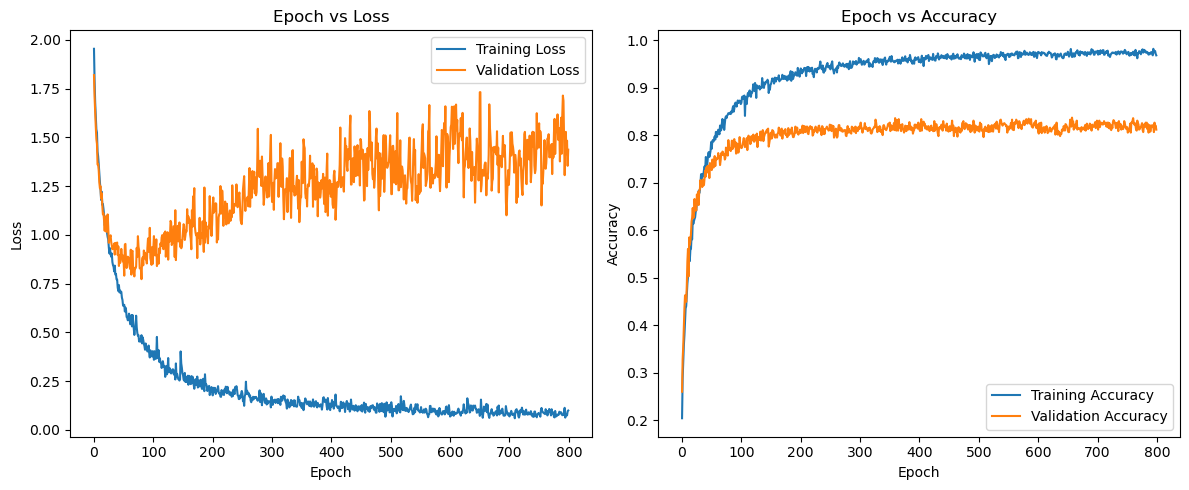

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.97%
Test Accuracy: 84.02%


6/6 [==============================] - 0s 2ms/step


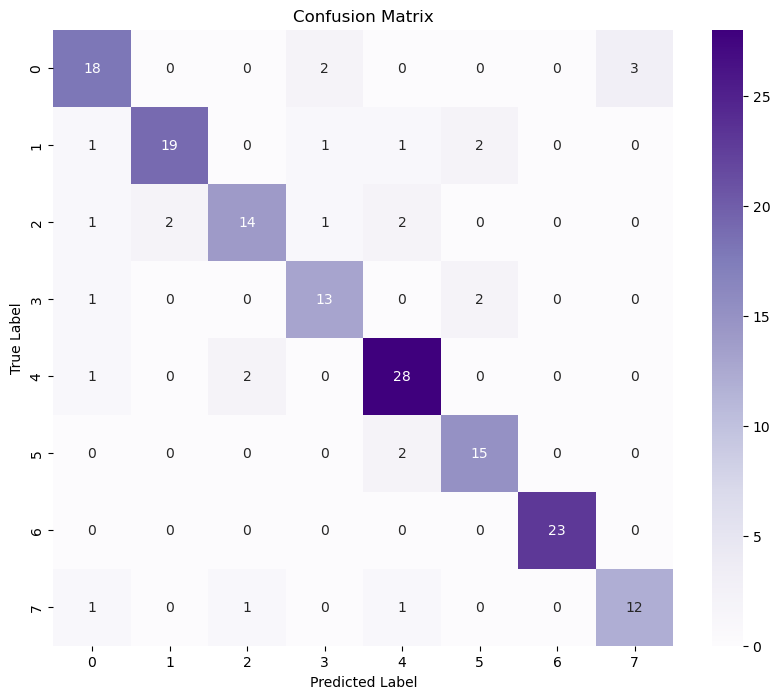

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.90      0.79      0.84        24
           2       0.82      0.70      0.76        20
           3       0.76      0.81      0.79        16
           4       0.82      0.90      0.86        31
           5       0.79      0.88      0.83        17
           6       1.00      1.00      1.00        23
           7       0.80      0.80      0.80        15

    accuracy                           0.84       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.84      0.84       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
